In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("=" * 70)
print("CIFAR-10 NEURAL NETWORK CLASSIFICATION")
print("=" * 70)



CIFAR-10 NEURAL NETWORK CLASSIFICATION


In [24]:
# ============================================================================
# STEP 1: LOAD AND EXPLORE DATA
# ============================================================================
print("\n[1] Loading CIFAR-10 Dataset...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"Training images shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test images shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# ============================================================================
# STEP 2: DATA PREPROCESSING
# ============================================================================
print("\n[2] Preprocessing Data...")

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images from (32, 32, 3) to (3072,)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print(f"Flattened training shape: {x_train_flat.shape}")
print(f"Flattened test shape: {x_test_flat.shape}")

# Convert labels to one-hot encoding
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

print(f"One-hot encoded labels shape: {y_train_cat.shape}")




[1] Loading CIFAR-10 Dataset...
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)

[2] Preprocessing Data...
Flattened training shape: (50000, 3072)
Flattened test shape: (10000, 3072)
One-hot encoded labels shape: (50000, 10)


In [25]:
# ============================================================================
# STEP 3: BUILD NEURAL NETWORK
# ============================================================================
print("\n[3] Building Neural Network...")

model = keras.Sequential([
    # Input layer
    layers.Input(shape=(3072,)),

    # Hidden Layer 1
    layers.Dense(512, activation='relu', name='hidden_layer_1'),
    layers.Dropout(0.3),

    # Hidden Layer 2
    layers.Dense(256, activation='relu', name='hidden_layer_2'),
    layers.Dropout(0.3),

    # Hidden Layer 3 (extra layer for better performance)
    layers.Dense(128, activation='relu', name='hidden_layer_3'),
    layers.Dropout(0.2),

    # Output Layer
    layers.Dense(10, activation='softmax', name='output_layer')
])

# ============================================================================
# STEP 4: COMPILE MODEL
# ============================================================================
print("\n[4] Compiling Model...")

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("\n" + "=" * 70)
print("MODEL SUMMARY")
print("=" * 70)
model.summary()

# ============================================================================
# STEP 5: TRAIN MODEL
# ============================================================================



[3] Building Neural Network...

[4] Compiling Model...

MODEL SUMMARY


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
print("\n[5] Training Model for 15 Epochs...")

history = model.fit(
    x_train_flat,
    y_train_cat,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)




[5] Training Model for 15 Epochs...
Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.2199 - loss: 2.0907 - val_accuracy: 0.3113 - val_loss: 1.9223
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.2863 - loss: 1.9287 - val_accuracy: 0.3249 - val_loss: 1.8630
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.3096 - loss: 1.8838 - val_accuracy: 0.3608 - val_loss: 1.8112
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.3187 - loss: 1.8567 - val_accuracy: 0.3552 - val_loss: 1.8082
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.3275 - loss: 1.8374 - val_accuracy: 0.3682 - val_loss: 1.7796
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.3365 - loss: 1.8134 - val_accuracy: 0.3946 - val_loss: 1.7483
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.3493 - loss: 1.7896 - val_accuracy: 0.3896 - val_loss: 1.7437
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accur

In [27]:
# ============================================================================
# STEP 6: EVALUATE MODEL
# ============================================================================
print("\n[6] Evaluating Model on Test Set...")

test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_cat, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# ============================================================================
# STEP 7: CREATE EPOCH-WISE ACCURACY TABLE
# ============================================================================
print("\n" + "=" * 70)
print("EPOCH-WISE TRAINING RESULTS")
print("=" * 70)




[6] Evaluating Model on Test Set...

Test Loss: 1.6611
Test Accuracy: 0.4183 (41.83%)

EPOCH-WISE TRAINING RESULTS


In [28]:
# Create DataFrame with training history
results_df = pd.DataFrame({
    'Epoch': range(1, 16),
    'Training Loss': history.history['loss'],
    'Training Accuracy': history.history['accuracy'],
    'Validation Loss': history.history['val_loss'],
    'Validation Accuracy': history.history['val_accuracy']
})

# Format the table
results_df['Training Loss'] = results_df['Training Loss'].apply(lambda x: f"{x:.4f}")
results_df['Training Accuracy'] = results_df['Training Accuracy'].apply(lambda x: f"{x:.4f}")
results_df['Validation Loss'] = results_df['Validation Loss'].apply(lambda x: f"{x:.4f}")
results_df['Validation Accuracy'] = results_df['Validation Accuracy'].apply(lambda x: f"{x:.4f}")

print(results_df.to_string(index=False))

# ============================================================================
# STEP 8: VISUALIZE TRAINING HISTORY
# ============================================================================


 Epoch Training Loss Training Accuracy Validation Loss Validation Accuracy
     1        2.0907            0.2199          1.9223              0.3113
     2        1.9287            0.2863          1.8630              0.3249
     3        1.8838            0.3096          1.8112              0.3608
     4        1.8567            0.3187          1.8082              0.3552
     5        1.8374            0.3275          1.7796              0.3682
     6        1.8134            0.3365          1.7483              0.3946
     7        1.7896            0.3493          1.7437              0.3896
     8        1.7801            0.3532          1.7477              0.3917
     9        1.7662            0.3552          1.6962              0.4058
    10        1.7557            0.3650          1.7129              0.4051
    11        1.7501            0.3658          1.7073              0.4008
    12        1.7372            0.3674          1.7032              0.3998
    13        1.7300     


[8] Generating Training Plots...
Training plots saved as 'cifar10_training_results.png'


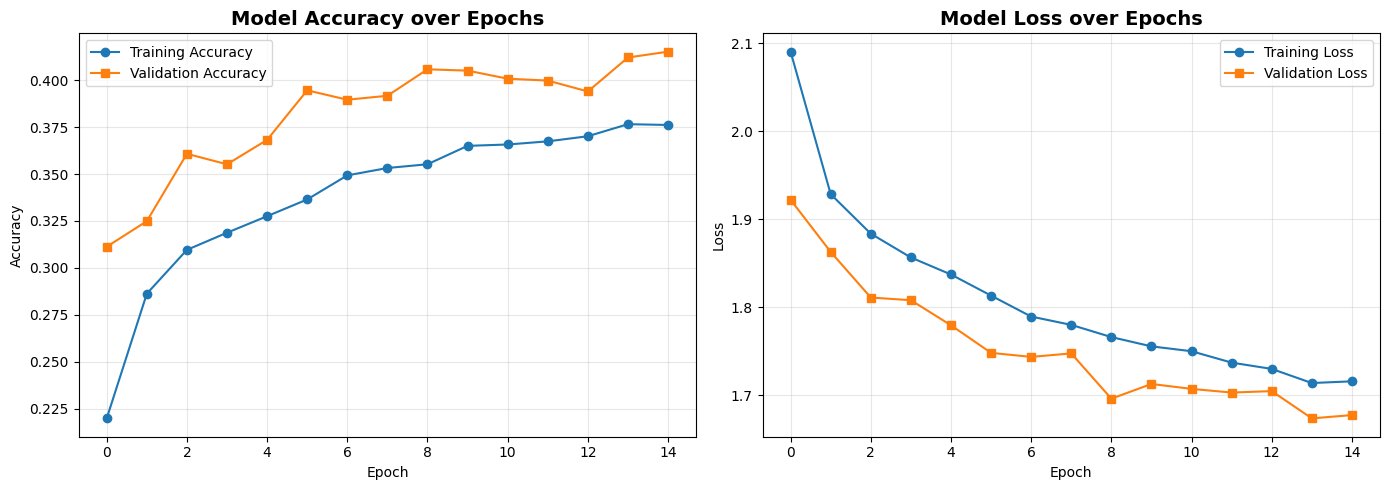


[9] Making Sample Predictions...

Sample Predictions:
------------------------------------------------------------
Image 1: Predicted = cat, Actual = cat, Correct = True
Image 2: Predicted = truck, Actual = ship, Correct = False
Image 3: Predicted = ship, Actual = ship, Correct = True
Image 4: Predicted = ship, Actual = airplane, Correct = False
Image 5: Predicted = deer, Actual = frog, Correct = False
Image 6: Predicted = frog, Actual = frog, Correct = True
Image 7: Predicted = dog, Actual = automobile, Correct = False
Image 8: Predicted = deer, Actual = frog, Correct = False
Image 9: Predicted = cat, Actual = cat, Correct = True
Image 10: Predicted = automobile, Actual = automobile, Correct = True

TRAINING COMPLETE!
Final Training Accuracy: 0.3762
Final Validation Accuracy: 0.4152
Test Accuracy: 0.4183


In [29]:
print("\n[8] Generating Training Plots...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
axes[0].set_title('Model Accuracy over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Validation Loss', marker='s')
axes[1].set_title('Model Loss over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('cifar10_training_results.png', dpi=300, bbox_inches='tight')
print("Training plots saved as 'cifar10_training_results.png'")
plt.show()

# ============================================================================
# STEP 9: SAMPLE PREDICTIONS
# ============================================================================
print("\n[9] Making Sample Predictions...")

# Get predictions for first 10 test images
predictions = model.predict(x_test_flat[:10], verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test[:10].flatten()

print("\nSample Predictions:")
print("-" * 60)
for i in range(10):
    print(f"Image {i+1}: Predicted = {class_names[predicted_classes[i]]}, "
          f"Actual = {class_names[true_classes[i]]}, "
          f"Correct = {predicted_classes[i] == true_classes[i]}")

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "=" * 70)
print("TRAINING COMPLETE!")
print("=" * 70)
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("=" * 70)